# Homework Assignment 3

Using the [Seattle Library Collection Inventory Dataset](https://www.kaggle.com/city-of-seattle/seattle-library-collection-inventory#library-collection-inventory.csv) and TuriCreate please, answer the following questions:

In [1]:
!pip install -U turicreate

In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [3]:
# see more details in the course first lecture
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token={"username":"amirbialer", "key":"f2af62d43f0aaf0ee3bea5998634a1b7"}
# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [4]:
# Creating a dataset directory

!mkdir ./datasets
!mkdir ./datasets/library-collection

# download the dataset from Kaggle and unzip it
!kaggle datasets download city-of-seattle/seattle-library-collection-inventory  -f library-collection-inventory.csv -p ./datasets/library-collection/
!unzip ./datasets/library-collection/*.zip  -d ./datasets/library-collection
!ls ./datasets/library-collection


mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/library-collection’: File exists
library-collection-inventory.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/library-collection/library-collection-inventory.csv.zip
replace ./datasets/library-collection/library-collection-inventory.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
library-collection-inventory.csv  library-collection-inventory.csv.zip


In [5]:
!ls -lh ./datasets/library-collection

total 15G
-rw-r--r-- 1 root root  11G Dec  1  2019 library-collection-inventory.csv
-rw-r--r-- 1 root root 3.8G Nov  8 06:04 library-collection-inventory.csv.zip


In [6]:
import turicreate as tc
%matplotlib inline

#Loading a CSV to SFrame (this can take some time)
sf = tc.SFrame.read_csv("/content/datasets/library-collection/library-collection-inventory.csv", nrows=1000)
sf

Successfully parsed 10 tokens: 
	0: 735439
	1: ["Genealog ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 1

1 lines failed to parse correctly

Finished parsing file /content/datasets/library-collection/library-collection-inventory.csv

Parsing completed. Parsed 100 lines in 2.31593 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 1

1 lines failed to parse correctly

Finished parsing file /content/datasets/library-collection/library-collection-inventory.csv

Parsing completed. Parsed 1000 lines in 0.89691 secs.

BibNum,Title,Author,ISBN,PublicationYear
3011076,A tale of two friends /adapted by Ellie O'Ry ...,"O'Ryan, Ellie","1481425730, 1481425749,9781481425735, ...",2014.
2248846,"Naruto. Vol. 1, UzumakiNaruto / story and ar ...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999."
3209270,"Peace, love & Wi-Fi : aZITS treasury / by Jerry ...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.
1907265,The Paris pilgrims : anovel / Clancy Carlile. ...,"Carlile, Clancy, 1930-",0786706155,c1999.
1644616,"Erotic by nature : acelebration of life, of ...",,094020813X,"1991, c1988."
1736505,Children of Cambodia'skilling fields : memoirs ...,,"0300068395, 0300078730",c1997.
1749492,Anti-Zionism : analyticalreflections / editors: ...,,091559773X,c1989.
3270562,Hard-hearted Highlander /Julia London. ...,"London, Julia","0373789998, 037380394X,9780373789993, ...",[2017]
3264577,The Sandcastle Empire /Kayla Olson. ...,"Olson, Kayla","0062484877, 9780062484871",2017.
3236819,Doctor Who. The return ofDoctor Mysterio / BBC ; ...,,,[2017]


In [7]:
import turicreate.aggregate as agg


**Question 1:** Write a function that returns the most popular book in each subject. Use it to find the most popular book in
    the _Mystery Fiction_ subject (15pt)

In [8]:
#def get_most_pop_by_subject(subj):
sf2 = sf['Title', 'Subjects','Author'] # to make things run faster, we create smaller SFrame
sf2['subject_list'] = sf2['Subjects'].apply(lambda s: s.split(","))
sf2['subject_list'] = sf2['subject_list'].apply(lambda l: [subject.strip().lower() for subject in l])
sf2 = sf2.remove_column('Subjects')
sf2 = sf2.stack("subject_list", new_column_name="subject") 


In [9]:
def get_most_pop_book(subj):
  #keep only specified subject
  sf3=sf2[sf2["subject"].apply(lambda l: subj.lower() in l)]
  #look for most popular book
  g=sf3.groupby('Title', {'Count': agg.COUNT()})
  book=g.sort("Count", ascending=False)[0]
  return book
get_most_pop_book(subj="Mystery Fiction")

{'Count': 1, 'Title': "All the queen's men / Ethan J. Wolfe."}

**Question 2**: Find the top-10 fiction subjects (5pt), and use Seaborn to visualize the number of items over time for each subject (15pt)
    

In [10]:
sf2["have_fiction"]=sf2["subject"].apply(lambda l: "fiction" in l.lower())
sf3=sf2[sf2["have_fiction"]]
g=sf3.groupby('subject', {'Count': agg.COUNT()})
subjects=g.sort("Count", ascending=False)[:10]

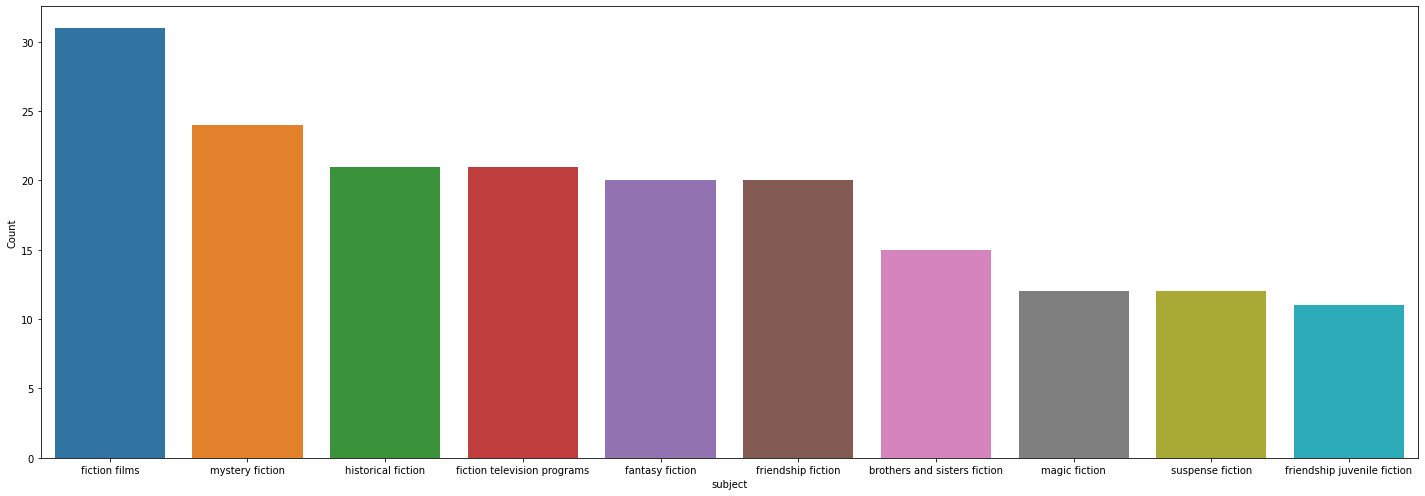

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(20,7))
sns.barplot(data=subjects.to_dataframe(), x="subject", y="Count",ax=ax)
fig.tight_layout()

**Question 3:** Write a function that gets as input a subject name. The function returns the top-20 most _popular_ authors for the input subject (15pt).



In [12]:
def most_pop_authors(subj):
  #keep only specified subject
  sf3=sf2[sf2["subject"].apply(lambda l: subj.lower() in l)]
  #look for most popular book
  g=sf3.groupby('Author', {'Count': agg.COUNT()})
  authors=g.sort("Count", ascending=False)[:20]
  return authors
most_pop_authors(subj="Mystery Fiction").print_rows(num_rows=20)

+-------------------------+-------+
|          Author         | Count |
+-------------------------+-------+
| Patterson, James, 1947- |   2   |
|       Ould, Chris,      |   1   |
|     King, Laurie R.     |   1   |
|   Wilson, Laura, 1964-  |   1   |
|     Atherton, Nancy     |   1   |
|      Fforde, Jasper     |   1   |
|      Todd, Charles      |   1   |
|  Douglas, Carole Nelson |   1   |
| DiSilverio, Laura A. H. |   1   |
|    Watson, Wendy Lyn    |   1   |
|      Muller, Marcia     |   1   |
|      Blake, Heather     |   1   |
|       Herron, Mick      |   1   |
|       Kerr, Philip      |   1   |
|    Estleman, Loren D.   |   1   |
|   Ryan, Hank Phillippi  |   1   |
|      Pronzini, Bill     |   1   |
|   Bain, Donald, 1935-   |   1   |
|  Allen, Jeffrey, 1970-  |   1   |
|   Green, George Dawes   |   1   |
+-------------------------+-------+
[20 rows x 2 columns]



Using the [The Blog Authorship Corpus](https://www.kaggle.com/rtatman/blog-authorship-corpus.htm) and TuriCreate, please answer the following questions:

**Question 4:** Calculate the average and median age of bloggers in each topic by gender(5pt). 
Calculate the average and median age of bloggers according to their sign (5pt). 
Visualize the age distributions  of bloggers according to their  topic and gender using Seaborn and PlotlyExpress(15pt)

In [13]:
!mkdir ./datasets/blog-authorship-corpus

# download the dataset from Kaggle and unzip it
!kaggle datasets download -d rtatman/blog-authorship-corpus  -f blogtext.csv -p ./datasets/blog-authorship-corpus/
!unzip ./datasets/blog-authorship-corpus/*.zip  -d ./datasets/blog-authorship-corpus
!ls ./datasets/library-collection


 96% 279M/290M [00:03<00:00, 127MB/s]
100% 290M/290M [00:03<00:00, 94.2MB/s]
Archive:  ./datasets/blog-authorship-corpus/blogtext.csv.zip
  inflating: ./datasets/blog-authorship-corpus/blogtext.csv  
library-collection-inventory.csv  library-collection-inventory.csv.zip


In [14]:
sf = tc.SFrame.read_csv("/content/datasets/blog-authorship-corpus/blogtext.csv", nrows=1000)
sf

Finished parsing file /content/datasets/blog-authorship-corpus/blogtext.csv

Parsing completed. Parsed 100 lines in 2.17882 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,int,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/blog-authorship-corpus/blogtext.csv

Parsing completed. Parsed 1000 lines in 1.00682 secs.

id,gender,age,topic,sign,date,text
2059027,male,15,Student,Leo,"14,May,2004","Info has beenfound (+/- 100 pages, ..."
2059027,male,15,Student,Leo,"13,May,2004",These are theteam members: Drewes ...
2059027,male,15,Student,Leo,"12,May,2004",In het kadervan kernfusie op aarde: ...
2059027,male,15,Student,Leo,"12,May,2004",testing!!!testing!!! ...
3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks toYahoo!'s Toolbar I can ...
3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had aninteresting conversation ...
3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",SomehowCoca-Cola has a way of ...
3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything,Korea is a country of ..."
3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a readof this news article ...
3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf theEnglish news sites a lot ...


## Age stats by topic and gender

In [15]:
mean=sf.groupby(key_column_names=["topic", "gender"],operations={'mean': agg.MEAN("age")} )
age=sf.groupby(key_column_names=["topic", "gender"],operations={"median":agg.QUANTILE("age",0.5)} )
age["median"]=age["median"].apply(lambda l: l[0])
mean.join(age, on=["topic","gender"])

gender,topic,mean,median
male,Non-Profit,25.0,25.0
male,Science,15.0,15.0
female,Student,16.75,17.0
male,Student,15.155172413793103,15.0
female,Banking,33.0,33.0
male,Engineering,24.0,24.0
female,Arts,15.0,15.0
female,Education,27.0,27.0
male,InvestmentBanking,33.0,33.0
male,Communications-Media,41.0,41.0


## Age stats by sign

In [16]:
mean=sf.groupby(key_column_names="sign",operations={'mean': agg.MEAN("age")} )
age=sf.groupby(key_column_names="sign",operations={"median":agg.QUANTILE("age",0.5)} )
age["median"]=age["median"].apply(lambda l: l[0])
mean.join(age, on=["sign"])

sign,mean,median
Sagittarius,24.244897959183675,23.0
Scorpio,22.353909465020575,24.0
Aquarius,28.243243243243253,27.0
Gemini,16.333333333333332,17.0
Leo,24.871794871794872,26.0
Capricorn,17.207792207792206,17.0
Cancer,24.228571428571428,25.0
Aries,15.630434782608699,17.0
Pisces,15.0,15.0
Virgo,23.0,23.0


## Visualization of age according to topic and gender

In [17]:
import plotly.figure_factory as ff
import plotly.express as px
sf3=sf[["age", "topic", "gender"]]
sf3["topic and gender"]="topic: "+sf["topic"]+"; gender: "+sf["gender"]
topic_and_gender_list=sf3["topic and gender"].unique()
topic_and_gender_list

name_list=[]
age_list=[]
for topic_gender in topic_and_gender_list:
  name_list.append(topic_gender)
  ages=list(sf3[sf3["topic and gender"]==topic_gender]["age"])
  age_list.append(ages)

In [18]:
import plotly.express as px
fig = px.histogram(sf3, x="age", color="topic and gender", marginal="rug",
                   hover_data=["age", "topic", "gender"])
fig.show()

**Question 5:** Using the  [SJR Journal Ranking of 2018](https://www.scimagojr.com/journalrank.php) dataset and Seaborn, visualize
    the H-index distributions according to the SJR Best Quartile (15pt). Using a grid, visualize the _Cites / Doc. (2years)_ histograms values of each publisher (15pt).
    


In [19]:
import pandas as pd

In [20]:
sf = tc.SFrame.read_csv("/content/gdrive/MyDrive/Studying/Big Data/HW3_203837695/scimagojr 2020.csv", nrows=10000)


Finished parsing file /content/gdrive/MyDrive/Studying/Big Data/HW3_203837695/scimagojr 2020.csv

Parsing completed. Parsed 100 lines in 0.710921 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,str,str,int,str,int,int,int,int,int,int,int,int,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/gdrive/MyDrive/Studying/Big Data/HW3_203837695/scimagojr 2020.csv

Parsing completed. Parsed 10000 lines in 0.200554 secs.

In [21]:
sf

Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index
1,28773,Ca-A Cancer Journal forClinicians ...,journal,"15424863, 00079235",62937,Q1,168
2,19434,MMWR Recommendations andReports ...,journal,"10575987, 15458601",40949,Q1,143
3,20315,Nature Reviews MolecularCell Biology ...,journal,"14710072, 14710080",37461,Q1,431
4,29431,Quarterly Journal ofEconomics ...,journal,"00335533, 15314650",34573,Q1,259
5,21100812243,Nature Reviews Materials,journal,20588437,32011,Q1,108
6,58530,National vital statisticsreports : from the ...,journal,"15518922, 15518930",28083,Q1,100
7,18434,Cell,journal,"00928674, 10974172",26304,Q1,776
8,18991,Nature Reviews Genetics,journal,"14710056, 14710064",26214,Q1,365
9,29719,Reviews of Modern Physics,journal,"00346861, 15390756",24877,Q1,363
10,24404,Journal of PoliticalEconomy ...,journal,"00223808, 1537534X",21034,Q1,186


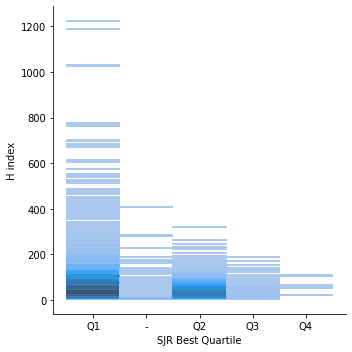

In [22]:
sns.displot(data=sf.to_dataframe(),y="H index",x="SJR Best Quartile")

### too many publisher, lets look at top 5

In [23]:
g=sf.groupby("Publisher", {"Count":agg.COUNT()})
best_5=g.sort("Count", ascending=False)[:5]
df=sf.to_dataframe()

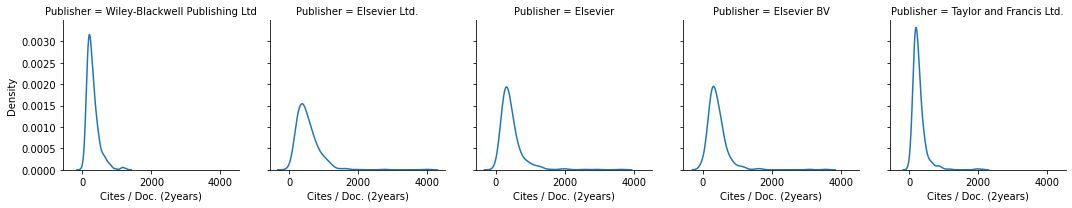

In [24]:
g = sns.FacetGrid(df[df["Publisher"].isin(best_5.to_dataframe()["Publisher"])], col="Publisher")
g.map(sns.kdeplot, "Cites / Doc. (2years)")